In [3]:
! pip install rioxarray rasterio numpy requests tqdm elevation
! pip install rasterio

In [2]:
import requests

# ======================
#  CONFIG (bạn có thể chỉnh)
# ======================
API_KEY = "demoapikeyot2022"   # đổi thành API key của bạn nếu có
DEM_TYPE = "SRTM15Plus"        # DEM có cả đất + bathymetry
OUTPUT_FILE = "vietnam_srtm15.tif"

# Bounding box Việt Nam + biển ven bờ
params = {
    "demtype": DEM_TYPE,
    "south": 8.0,
    "north": 24.5,
    "west": 102.0,
    "east": 110.0,
    "outputFormat": "GTiff",
    "API_Key": API_KEY
}

# ======================
#  DOWNLOAD
# ======================
url = "https://portal.opentopography.org/API/globaldem"
print(f"Requesting DEM from {url}")

response = requests.get(url, params=params, stream=True)

if response.status_code == 200:
    with open(OUTPUT_FILE, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"✅ Download complete: {OUTPUT_FILE}")
else:
    print(f"❌ Error: HTTP {response.status_code}")
    print(response.text)


Requesting DEM from https://portal.opentopography.org/API/globaldem
✅ Download complete: vietnam_srtm15.tif


In [4]:
import rasterio

path = "vietnam_srtm15.tif"

with rasterio.open(path) as src:
    dem = src.read(1)           # đọc band 1 (elevation)
    profile = src.profile       # metadata
    bounds = src.bounds         # bounding box
    transform = src.transform   # affine transform (để map pixel -> lon/lat)

print(dem.shape)
print(profile)


(3960, 1920)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 1920, 'height': 3960, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004166666666666665, 0.0, 101.99999999999989,
       0.0, -0.004166666666666665, 24.50000000000003), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


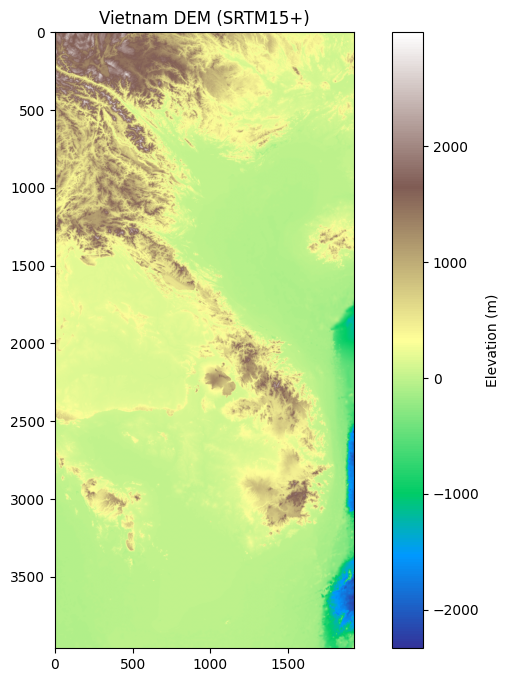

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(dem, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title("Vietnam DEM (SRTM15+)")
plt.show()
